In [1]:
# Load necessary library
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.4.3"


In [2]:
# Check precip data
head(precip)

Mobile      Juneau     Phoenix Little Rock Los Angeles  Sacramento 
       67.0        54.7         7.0        48.5        14.0        17.2

In [3]:
is.vector(precip)

[1] TRUE

In [4]:
mean(precip)

[1] 34.88571

In [5]:
# Function to compute t-statistic
t.statistic <- function(thesample, thepopulation) {
  numerator <- mean(thesample) - thepopulation
  denominator <- sd(thesample) / sqrt(length(thesample))
  t.stat <- numerator / denominator
  return(t.stat)
}

In [6]:
# Generate a large population with mean 38
population.precipitation <- rnorm(100000, mean = 38,sd = 10)  # Added standard deviation

In [7]:
# Initialize vector for t-statistics
t.stats <- numeric(10000)

In [8]:
# Compute t-statistics using t.test() for 10,000 samples
for (i in 1:10000) {
  a.sample <- sample(population.precipitation, 70)
  t.stats[i] <- t.test(a.sample, mu = 38)$statistic  # Using inbuilt function
}

In [9]:
# Create histogram of t-statistics
tmpdata <- data.frame(vals = t.stats)

Warning message:
"`qplot()` was deprecated in ggplot2 3.4.0."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


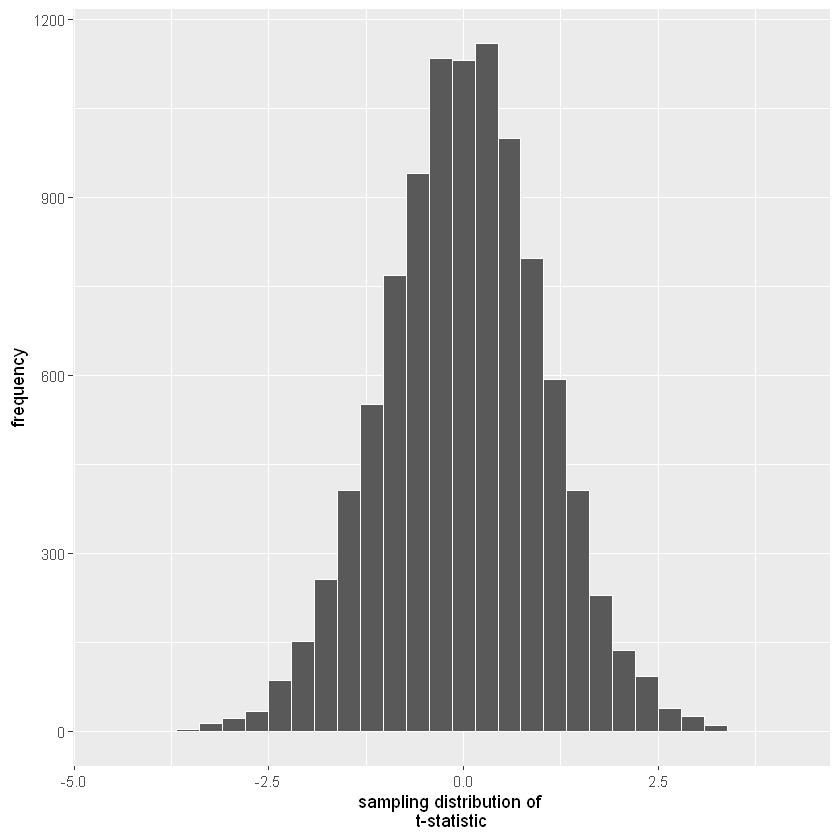

In [10]:
qplot(vals, data=tmpdata, geom="histogram",color=I("white"),xlab="sampling distribution of 
t-statistic",ylab="frequency")

In [11]:
# Perform t-tests on actual precip data
t.test(precip, mu = 38)  # Perform one-sample t-test


	One Sample t-test

data:  precip
t = -1.901, df = 69, p-value = 0.06148
alternative hypothesis: true mean is not equal to 38
95 percent confidence interval:
 31.61748 38.15395
sample estimates:
mean of x 
 34.88571 


In [12]:
qt(.025, df=69)

[1] -1.994945

In [13]:
t.test(precip, mu = 38, alternative = "less")  # One-tailed t-test (left-tailed)


	One Sample t-test

data:  precip
t = -1.901, df = 69, p-value = 0.03074
alternative hypothesis: true mean is less than 38
95 percent confidence interval:
     -Inf 37.61708
sample estimates:
mean of x 
 34.88571 


In [14]:
t.statistic(precip, population.precipitation)

[1] -3.481332e+00  1.209314e+00  2.539154e+00 -2.775570e+00 -4.077383e+00
     [6] -9.881872e+00 -7.625594e+00 -4.471761e+00  5.353294e+00 -8.187687e+00
    [11] -4.871412e+00 -8.276755e+00  1.881693e+00 -4.148610e+00  1.357547e+00
    [16] -7.420887e+00 -9.978853e+00 -3.839896e+00  2.430430e+00 -3.077457e-01
    [21]  1.214327e+01  8.022299e+00  9.472029e+00  4.228593e+00  4.098026e+00
    [26]  2.204789e-02 -7.793811e+00 -4.510308e+00  1.121311e+01 -1.158580e+01
    [31]  2.072958e+00 -7.881449e+00 -6.737290e+00 -1.252032e+01 -3.276895e+00
    [36] -4.308845e+00 -5.697746e+00 -1.196113e+01  2.421882e-01 -4.443866e+00
    [41]  7.961992e+00 -9.628462e+00  4.183693e+00 -1.199129e+00 -1.354276e+01
    [46] -2.554216e+00  3.040015e+00 -3.887096e-01 -8.652666e+00  5.644773e+00
    [51] -1.499008e-01 -7.088633e+00 -1.644062e+00  2.501590e-01  6.188717e+00
    [56]  4.829663e-02 -4.104229e+00  2.774473e+00 -1.253128e+00 -1.001802e+01
    [61]  7.775643e+00 -4.500065e+00 -3.553125e+00 -1.725964e+01 -1.285843e+01
    [66] -3.789971e+00  1.797355e+00 -1.641949e+00  2.775898e-01 -3.593126e-01
    [71] -4.139138e+00  3.363786e-02  4.064369e+00 -3.168226e+00 -8.806137e+00
    [76]  1.176628e-01  1.295885e+00 -1.354320e+00 -3.929379e+00  6.169565e+00
    [81] -1.167776e+00  7.390927e+00  8.542965e+00  1.674197e+00 -5.139255e+00
    [86] -7.278907e+00 -9.147200e+00 -3.711793e-01 -2.984589e+00 -1.805527e+00
    [91] -6.635343e-03  4.708439e+00 -4.938466e+00  4.116394e+00 -1.291982e+01
    [96] -2.622805e+00  1.130600e+00 -3.914079e+00 -7.557033e+00 -1.718099e+01
   [101] -4.082619e+00 -2.564011e+00  1.342129e+00 -4.260884e+00 -3.577676e+00
   [106] -1.114027e+01  4.309634e+00 -4.963305e+00 -7.616758e-01  5.120166e+00
   [111] -6.782925e+00 -1.514706e+00  2.493608e+00 -1.435889e+00 -6.883943e+00
   [116]  3.311867e-01 -1.457280e+00 -8.698621e+00 -1.975659e+00 -2.952969e+00
   [121] -3.402955e+00  1.094043e+01 -5.216629e+00 -9.177249e+00  6.135017e+00
   [126]  3.345299e+00 -1.138133e+01  6.984974e+00 -2.490531e+00  3.188891e+00
   [131] -1.741867e+00 -9.722698e+00 -5.951729e+00 -9.162703e-01 -3.270141e+00
   [136] -9.854952e+00 -1.455152e+01 -1.475084e+00 -7.334370e+00  8.532234e-01
   [141] -2.072591e+00  3.303884e+00 -1.068121e+01 -5.287143e+00 -4.842201e+00
   [146] -9.945951e+00  6.505486e-01 -2.765740e+00 -1.602867e+00 -4.916592e+00
   [151]  3.056334e+00  9.485304e-01  6.936292e+00  8.153346e+00 -1.195742e+01
   [156] -8.374229e-01 -2.345407e+00 -6.728870e+00 -1.027127e+01 -7.428089e+00
   [161] -1.330985e+01  8.882943e+00  5.715247e+00 -2.803351e+00 -1.107578e+01
   [166] -4.287974e+00 -9.571891e+00  3.885937e+00  3.708682e+00 -1.251003e+01
   [171]  8.623767e+00 -2.039862e+01 -4.809679e+00 -1.357592e+01  1.527918e+00
   [176] -5.433412e+00  2.355665e+00 -5.252025e+00  4.272923e+00 -2.243669e+00
   [181] -1.525049e+00  5.211203e+00  1.002210e+00 -6.182037e-01 -3.504415e+00
   [186] -5.095060e+00  1.995205e+00  4.807177e+00 -1.670675e+01  1.637389e+00
   [191]  1.510820e+00 -3.416421e+00  1.259327e+00 -2.927268e+00 -6.287785e-01
   [196]  3.687208e+00 -9.019968e-01 -1.133347e+01  1.018270e+01 -2.527481e+00
   [201] -8.610224e+00 -1.245381e+01  2.124609e-01 -8.679828e+00  5.632451e+00
   [206] -5.228105e+00 -5.186567e-01  1.956122e+00 -8.131248e+00 -9.505351e+00
   [211] -2.380309e+00 -5.781978e+00 -3.121089e+00 -3.016299e+00 -3.447443e+00
   [216] -3.126264e+00 -5.887878e+00 -8.959346e+00 -8.694538e-01 -5.681534e+00
   [221] -1.125138e+00  3.446578e+00 -4.444808e+00 -1.878464e+00 -1.908168e+00
   [226] -1.112716e+01  2.508143e+00 -5.343018e+00  3.644472e+00  7.461242e+00
   [231] -6.355361e+00 -1.142616e+00  2.333604e+00 -5.867682e+00  1.792225e+00
   [236] -1.120377e+01  3.508064e+00 -1.173383e+01 -9.435459e+00  1.058943e+00
   [241] -5.940279e+00 -9.059360e+00 -4.076153e+00  6.325409e+00 -2.262147e+00
   [246] -5.120039e+00 -5.628642e+00 -5.892526e-01 -6.981570e+00 -6.267123e+00
   [251] -3.023544e+00  6.450885e-01  4.521514e+00  9.0